# Project Phase II: Data Curation, Exploratory Analysis and Plotting

Names: Gabriella Martinez, Arav Kumar, Catrina Herman, Berke Maltepe

Topic: Displacement in Puerto Rico

Data: The World Bank

### Part 1 - Motivation and Data Pipeline

##### Central Motivation
Our project is inspired by rising concerns of gentrification and displacement of local populations in Puerto Rico. There is much conflicting news regarding the state of Puerto Rican culture and livlihood due to the influx of Americans and other foriengers to the island. From this interest, we decided to study population trends in Puerto Rico, to uncover the truth about what is happening on the island. We aim to answer the following questions: How are economic factors influincing migration to or from Puerto Rico for natives and foriegners? How has gentrification impacted urban population growth and displacement in Puerto Rico? The focus on economic factors, which we will use GDP to measure, will provide insight into who is benefiting from resources on the island and compared with migration data, will support or deny theories on the state of gentrificaiton in PR. Additionally, using urban population data, we will explore how the economic stance of the island contributes to increases or decreases of urban areas, thus trying to uncover more information about how demographics on the island are changing because of gentrification.

##### Data Explanation
The data we have chosen will help answer our research questions by providing insight into different aspects of Puerto Rico’s economic and demographic changes. The World Bank offers multiple datasets that allow for an in-depth analysis of key factors related to gentrification and population shifts. From this, we will examine GDP per capita, urban population growth, and migration data. Analyzing GDP per capita over time will help determine how Puerto Rico’s economic landscape has changed, identifying periods of significant growth or decline. Urban population growth data will allow me to see how cities are expanding and whether urbanization trends align with economic changes. Migration data will provide insights into population movements—whether people are leaving or relocating to specific areas—and how those shifts may correlate with economic factors. Each dataset includes 'date' and 'value' attributes, which I will use to merge the datasets and create a clean, unified dataset. This will allow us to track trends over time and analyze relationships between GDP, migration, and urban population growth. By examining these variables together, we aim to uncover patterns that may indicate economic or demographic shifts contributing to gentrification in Puerto Rico.

##### Data Processing Pipline
The first step in our data processing pipeline is to obtain the data using the World Bank API, which will be separated into three datasets because we are gathering from three different ones. Next, we will make the necessary dataframes for urban population growth, GDP per capita, and migration data. They will then need to be filtered for just the relevant information, which includes date and value. Because all dataframes have the 'date' feature, they will be merged on that column to be analyzed together. Finally, we are adding a categorical variable by creating a column that shows the decade, which will make it easier to visualize our data over time.

### Part 2 - Cleaning Data

In [8]:
import requests
import json
import pandas as pd

In [ ]:
# PR Urban Population Growth
url1 = 'https://api.worldbank.org/V2/country/PRI/indicator/SP.URB.TOTL.IN.ZS?format=json'
response1 = requests.get(url1)
PR_pop_growth = response1.json()
print(PR_pop_growth[1])

# PR GDP per Capita
url2 = 'https://api.worldbank.org/V2/country/PRI/indicator/NY.GDP.PCAP.CD?format=json'
response2 = requests.get(url2)
PR_gdp = response2.json()
PR_gdp
print(PR_gdp[1])

# PR Migration Data
url3 = 'https://api.worldbank.org/V2/country/PRI/indicator/SM.POP.NETM?format=json'
response3 = requests.get(url3)
PR_migration = response3.json()
PR_migration[1]

In [11]:
# make the population growth dataframe
pop_growth_df = pd.json_normalize(PR_pop_growth[1])
pop_growth_df = pop_growth_df[['date', 'value']]
pop_growth_df = pop_growth_df.rename(columns={'value': 'Urban Population Growth'})
pop_growth_df.head()

,date,Urban Population Growth
0,2023,93.634
1,2022,93.610
2,2021,93.592
3,2020,93.581
4,2019,93.576


In [14]:
# make the GDP per capita dataframe
gdp_df = pd.json_normalize(PR_gdp[1])
gdp_df = gdp_df[['date', 'value']]
gdp_df = gdp_df.rename(columns={'value': 'GDP Per Capita'})
gdp_df.head()

,date,GDP Per Capita
0,2023,36779.059491
1,2022,35268.079102
2,2021,32619.250417
3,2020,31427.429114
4,2019,32916.866801


In [16]:
# make the migration dataframe
migration_df = pd.json_normalize(PR_migration[1])
migration_df = migration_df[['date', 'value']]
migration_df = migration_df.rename(columns={'value': 'Migration'})
migration_df.head()

,date,Migration
0,2023,19833
1,2022,16704
2,2021,-7410
3,2020,-7410
4,2019,10623


In [18]:
# merge the dataframes
merged_df = pd.merge(pop_growth_df, gdp_df, on='date')
PR_df = pd.merge(merged_df, migration_df, on='date')
PR_df.head()

,date,Urban Population Growth,GDP Per Capita,Migration
0,2023,93.634,36779.059491,19833
1,2022,93.610,35268.079102,16704
2,2021,93.592,32619.250417,-7410
3,2020,93.581,31427.429114,-7410
4,2019,93.576,32916.866801,10623


In [59]:
# make a categorical column for decade
decades = []
for value in PR_df['date']:
    decade = value[0:3] + '0'
    decades.append(decade)

PR_df['decade'] = decades
PR_df.head()
PR_df["date"] = pd.to_numeric(PR_df["date"])

### Part 3 - Visualizations

In [23]:
import matplotlib.pyplot as plt

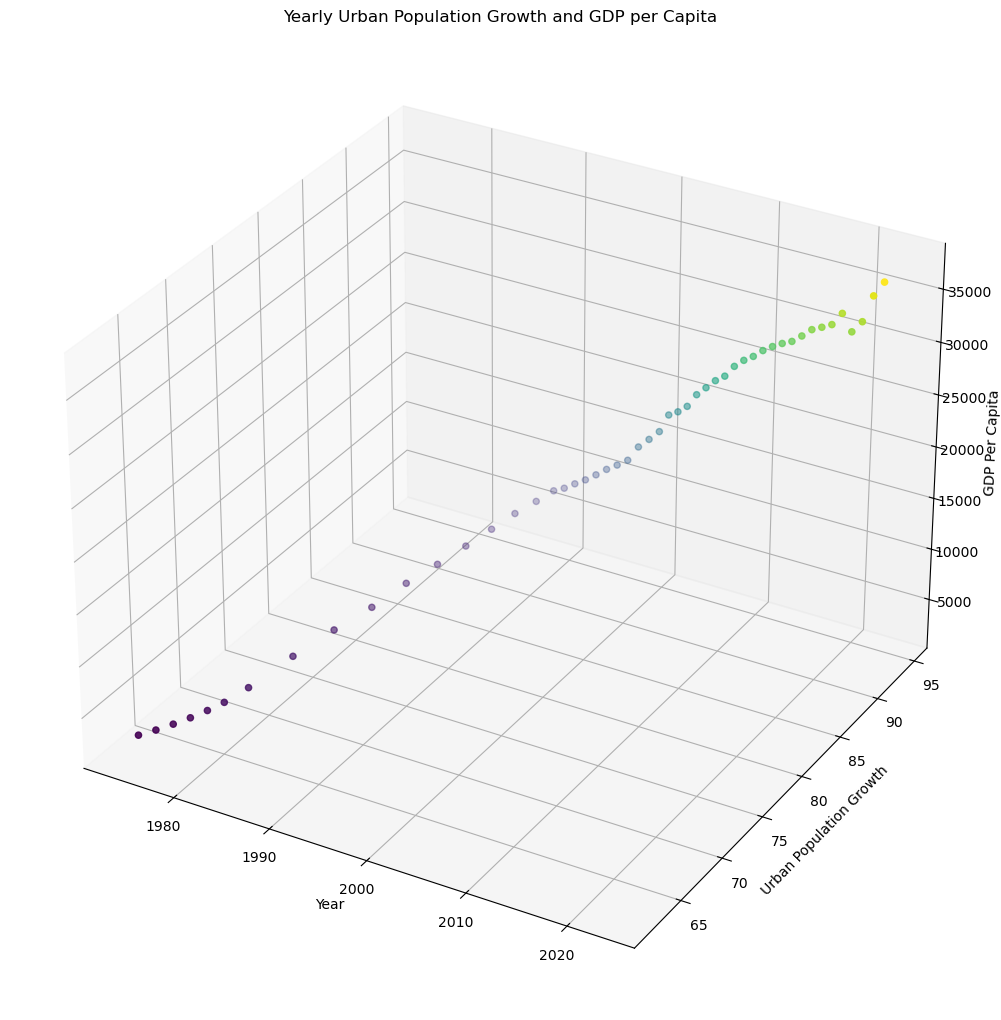

In [87]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(PR_df["date"], PR_df["Urban Population Growth"], PR_df["GDP Per Capita"], c=PR_df["GDP Per Capita"], cmap="viridis")
ax.set_xlabel("Year")
ax.set_ylabel("Urban Population Growth")
ax.set_zlabel("GDP Per Capita")
ax.set_title("Yearly Urban Population Growth and GDP per Capita")
plt.show()